In [45]:
import glob 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale, normalize
import missingno as msno


# Loading 
import glob 
import pandas as pd 
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import butter, lfilter, hilbert, chirp
from itertools import islice 
from matplotlib.font_manager import FontProperties
from sklearn.preprocessing import scale, normalize
from scipy.signal import welch
import torch
from scipy.stats import kurtosis
import antropy as ant

In [36]:
PATH_featureFiles = 'data/feature_bag_data' 

filesList = glob.glob(PATH_featureFiles+'/*.npy')
labelData = pd.read_csv('data/bagData/Labels_all.csv')
# check dimension
first = np.load(filesList[0]).astype(np.float64)
print(first.shape)
print(len(filesList))

(180, 5, 12)
1203


In [37]:
labelData['featurefiles'] = ['feature_'+x for x in labelData['filenames']]

In [38]:
labelData

,filenames,binary,featurefiles
0,0_110011.npy,0,feature_0_110011.npy
1,1_110011.npy,1,feature_1_110011.npy
2,2_110011.npy,1,feature_2_110011.npy
3,3_110011.npy,1,feature_3_110011.npy
4,4_110011.npy,1,feature_4_110011.npy
...,...,...,...
1198,66_110003.npy,0,feature_66_110003.npy
1199,67_110003.npy,0,feature_67_110003.npy
1200,68_110003.npy,0,feature_68_110003.npy
1201,69_110003.npy,0,feature_69_110003.npy


In [41]:
first[2,:,0]

array([           nan,            nan,            nan,            nan,
       4.96682909e-37])

In [40]:
filesList[0]

'data/feature_bag_data/feature_4_110010.npy'

In [33]:
firstt = np.load('data/bagData/4_110010.npy').astype(np.float64)



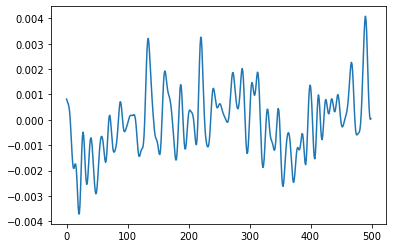

In [43]:
plt.plot((firstt[2,:,0]))

In [46]:
kurtosis_ = kurtosis(firstt[2,:,0])

In [47]:
kurtosis_

0.4004353822046771

In [48]:
np.sqrt(np.mean(firstt[2,:,0]**2))

0.0012862825717200814

In [49]:
ant.app_entropy(firstt[2,:,0])

0.6005089178473724

In [54]:

## call function if needed. 
def featureExtraction(data):    
    sr = 100 

    a = torch.empty((180,5,12))

    for idj in range(data.shape[2]):
        
        for idk in range(data.shape[0]):
            
            f, spec = welch(data[idk,:,idj], fs=sr, nperseg=sr )
            
            selected = np.logical_and(f>3.5,f<7.5)
            
            spec = np.mean(np.log(spec[selected])) # mean frequency in tremor-spectrum 

            rms = np.sqrt(np.mean(data[idk,:,idj]**2)) # RMS 

            kurtosis_ = kurtosis(data[idk,:,idj]) # Kurtosis 

            entropySpec = ant.spectral_entropy(data[idk,:,idj], sf=sr, method='welch', normalize=True)  # Approximate entropy 

            entropy = ant.app_entropy(data[idk,:,idj])  # Approximate entropy 

            a[idk,0,idj] = spec
            a[idk,1,idj] = rms
            a[idk,2,idj] = kurtosis_
            a[idk,3,idj] = entropySpec
            a[idk,4,idj] = entropy
    
    return a
    

In [55]:
a = featureExtraction(firstt)

In [56]:
a[2,:,0]

tensor([-1.5912e+01,  1.2863e-03,  4.0044e-01,  5.8463e-01,  6.0051e-01])